Imorting Libraries

In [83]:
import pandas as pd
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2 as cv

Data extraction ,processing and expanstion

In [91]:

x=os.walk(r"./data")
x=list(x)
entries={}
it = 0
for i in range(1,len(x)) :

    entries[i]=x[i][0].split("\\")[-1]
    
print(entries)
def horizontal_flip(img, flag):
    if flag>0.5:
        return cv.flip(img, 1)
    else:
        return img



for i in range(1,51):
    li=os.listdir("./data/"+entries[i])
    for j in range(len(li)):
    
        name="./data/"+entries[i]+"/"+li[j]
        if "r" not in li[j]:
            img=cv.imread(name)
            rotation_matrix=cv.getRotationMatrix2D((img.shape[1]/2,img.shape[0]/2),np.random.uniform(1,30),1)
            rotation_matrix2=cv.getRotationMatrix2D((img.shape[1]/2,img.shape[0]/2),-1*np.random.uniform(1,30),1)
            r1=cv.warpAffine(img,rotation_matrix,(img.shape[1],img.shape[0]))
            r2=cv.warpAffine(img,rotation_matrix2,(img.shape[1],img.shape[0]))
            rr=np.random.uniform(0,1)
            cv.imwrite("./data/"+entries[i]+"/"+li[j]+"rc"+".jpg",horizontal_flip(r1,rr))
            rr=np.random.uniform(0,1)
            cv.imwrite("./data/"+entries[i]+"/"+li[j]+"ra"+".jpg",horizontal_flip(r2,rr))
    




train_generator, validation_generator = tf.keras.utils.image_dataset_from_directory(
    directory='data/',
    labels='inferred',
    label_mode='categorical',
    batch_size=64,
    image_size=(404, 303),
    shuffle=True,
    seed=123,
    validation_split=0.2,# 20% of the data will be used for validation
    subset="both")# splliting valadation  and trian


{1: 'Acacia', 2: 'Adenanthera microsperma', 3: 'Adenium species', 4: 'Anacardium occidentale', 5: 'Annona squamosa', 6: 'Artocarpus altilis', 7: 'Artocarpus heterophyllus', 8: 'Barringtonia acutangula', 9: 'Cananga odorata', 10: 'Carica papaya', 11: 'Casuarina equisetifolia', 12: 'Cedrus', 13: 'Chrysophyllum cainino', 14: 'Citrus aurantiifolia', 15: 'Citrus grandis', 16: 'Cocos nucifera', 17: 'Dalbergia oliveri', 18: 'Delonix regia', 19: 'Dipterocarpus alatus', 20: 'Erythrina fusca', 21: 'Eucalyptus', 22: 'Ficus microcarpa', 23: 'Ficus racemosa', 24: 'Gmelina arborea Roxb', 25: 'Hevea brasiliensis', 26: 'Hopea', 27: 'Khaya senegalensis', 28: 'Khaya senegalensis A.Juss', 29: 'Lagerstroemia speciosa', 30: 'Magnolia alba', 31: 'Mangifera', 32: 'Melaleuca', 33: 'Melia azedarach', 34: 'Musa', 35: 'Nephelium lappaceum', 36: 'Persea', 37: 'Polyalthia longifolia', 38: 'Prunnus', 39: 'Prunus salicina', 40: 'Psidium guajava', 41: 'Pterocarpus macrocarpus', 42: 'Senna siamea', 43: 'Spondias mombi

Functions to build the cnn layer

In [88]:
def makeHiddenLayers(inputs):
        cnn = tf.keras.layers.Conv2D(16, (3, 3), padding="same",activation="relu")(inputs)
        cnn = tf.keras.layers.BatchNormalization(axis=-1)(cnn)
        cnn = tf.keras.layers.MaxPooling2D(pool_size=(3, 3))(cnn)
        cnn = tf.keras.layers.Dropout(0.25)(cnn)
        cnn = tf.keras.layers.Conv2D(32, (3, 3), padding="same")(cnn)
        cnn = tf.keras.layers.Activation("relu")(cnn)
        cnn = tf.keras.layers.BatchNormalization(axis=-1)(cnn)
        cnn = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(cnn)
        cnn = tf.keras.layers.Dropout(0.25)(cnn)
        cnn = tf.keras.layers.Conv2D(32, (3, 3), padding="same")(cnn)
        cnn = tf.keras.layers.Activation("relu")(cnn)
        cnn = tf.keras.layers.BatchNormalization(axis=-1)(cnn)
        cnn = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(cnn)
        cnn = tf.keras.layers.Dropout(0.25)(cnn)
        return cnn #return the layer of the hidden layers
def makeOutputLayer(inputs,class_dict):
    cnn=makeHiddenLayers(inputs)
    cnn = tf.keras.layers.Flatten()(cnn)
    cnn = tf.keras.layers.Dense(128)(cnn)
    cnn = tf.keras.layers.Activation("relu")(cnn)
    cnn = tf.keras.layers.BatchNormalization()(cnn)
    cnn = tf.keras.layers.Dropout(0.5)(cnn)
    cnn = tf.keras.layers.Dense(class_dict)(cnn)
    cnn = tf.keras.layers.Activation("softmax", name="Bark_Output")(cnn)

    return cnn # return the output layer
def assemble(width,height,class_dict):
    inputs = tf.keras.layers.Input(shape=(height, width, 3))
    cnnOutputLayers=makeOutputLayer(inputs,class_dict)
    model=tf.keras.models.Model(inputs=inputs,outputs = [cnnOutputLayers],name="face_net")
    return model # return the model 


Model assembly and traning

In [92]:
X=assemble(303, 404,50)
X.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
HistoryModel=X.fit(x = train_generator , validation_data = validation_generator, epochs = 20)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
210/210 [==============================] - ETA: 0s - loss: 2.5005 - accuracy: 0.3593WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001C191862F78> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`

In [93]:

test_image = tf.keras.utils.load_img(r'data\Adenanthera microsperma\IMG_5777.JPG', target_size = (404,303))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = X.predict(test_image)
maxIndex=0

for i in range(1,50):
      if result[0][i]>result[0][maxIndex]:
            maxIndex=i
print(entries[maxIndex+1])


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 1s 767ms/step
Adenanthera microsperma


Accuercy graph

In [96]:
print(HistoryModel.history)

{'loss': [2.5005087852478027, 1.227049469947815, 0.7640150785446167, 0.513785183429718, 0.38093462586402893, 0.2786526083946228, 0.22283153235912323, 0.18414224684238434, 0.15595857799053192, 0.13265909254550934, 0.12282534688711166, 0.10506962984800339, 0.10757759213447571, 0.09050466865301132, 0.08912696689367294, 0.09160690009593964, 0.10451434552669525, 0.07980229705572128, 0.0735752284526825, 0.07061094790697098], 'accuracy': [0.3592769503593445, 0.6741111278533936, 0.7987003326416016, 0.8687630891799927, 0.9000597596168518, 0.9263519644737244, 0.9424858093261719, 0.9489094614982605, 0.9576486349105835, 0.9647445678710938, 0.9668359756469727, 0.9713922739028931, 0.9686286449432373, 0.9752763509750366, 0.97408127784729, 0.9725127220153809, 0.9673588275909424, 0.9777412414550781, 0.97789067029953, 0.9776665568351746], 'val_loss': [2.6046574115753174, 1.4254239797592163, 1.4792389869689941, 1.2287758588790894, 0.8040998578071594, 1.1904343366622925, 0.7097095251083374, 1.058815479278

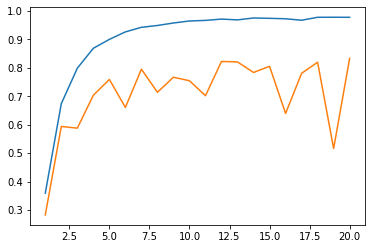

In [97]:
plt.plot(range(1,21),HistoryModel.history['accuracy'],label="Training Accuracy")
plt.plot(range(1,21),HistoryModel.history['val_accuracy'],label="Validation Accuracy")

Loss Graph

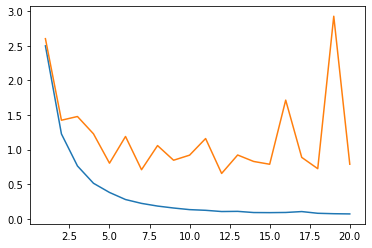

In [98]:
plt.plot(range(1,21),HistoryModel.history['loss'],label="Training Accuracy")
plt.plot(range(1,21),HistoryModel.history['val_loss'],label="Validation Accuracy")